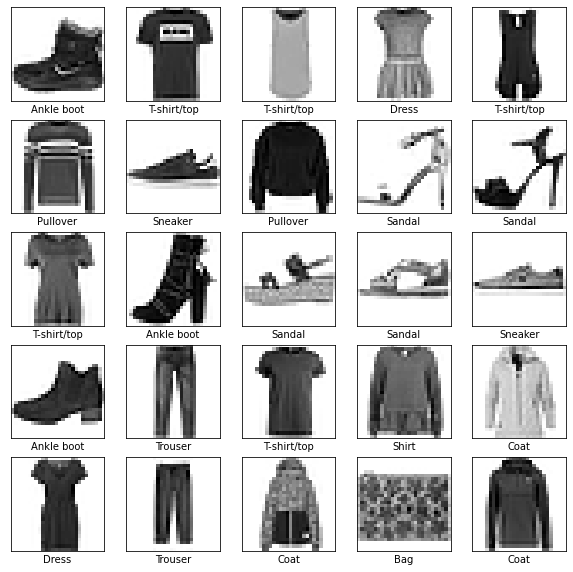

In [4]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images / 255.0

test_images = test_images / 255.0

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4975 - accuracy: 0.8247
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3698 - accuracy: 0.8667
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3348 - accuracy: 0.8790
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3128 - accuracy: 0.8845
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2942 - accuracy: 0.8924
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2783 - accuracy: 0.8970
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2680 - accuracy: 0.9008
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2580 - accuracy: 0.9038
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2492 - accuracy: 0.9069
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.238

In [9]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3586 - accuracy: 0.8784

Test accuracy: 0.8784000277519226


In [10]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [11]:
predictions = probability_model.predict(test_images)

In [13]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

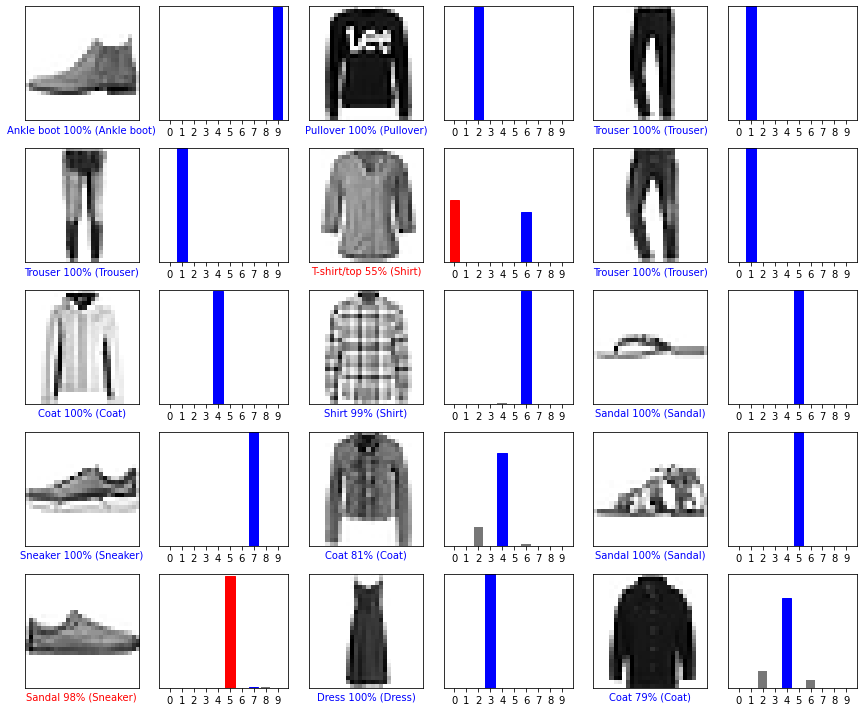

In [14]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()